# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [5]:
from string import ascii_lowercase as letters  #importo array di lettere
print(letters,"\n")
# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print (xs,'\n')
print (xs.index,'\n')
# Values of the Series are actually a numpy array
print (xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')   #gli indici sono anche metodi della serie
print (xs[['d', 'f', 'h']], '\n')    #printo i valori di xs dati dalla maschera data dalla lista

abcdefghijklmnopqrstuvwxyz 

a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 



In [6]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Note that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and nparray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

In [7]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
s[1:] + s[:-1]  #tutti dal secondo + tutti fino al penultimo quindi primo e ultimo non sono definiti

a         NaN
b   -4.014831
c    1.138656
d    0.045346
e         NaN
dtype: float64

### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [25]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print (date)
date = dt.datetime(2018,11,19,14,45,10,15)  #anni,mesi,giorni,ore,minuti,secondi,microsecondi(10^-6)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 19 2018'
print (date)
date = '19/11/2018 14:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days,"\n")

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2018-11-19
2018-11-19 14:45:10.000015
Nov 19 2018
19/11/2018 14:45:00
DatetimeIndex(['2018-11-19 14:45:00', '2018-11-20 14:45:00',
               '2018-11-21 14:45:00', '2018-11-22 14:45:00',
               '2018-11-23 14:45:00', '2018-11-24 14:45:00',
               '2018-11-25 14:45:00'],
              dtype='datetime64[ns]', freq='D') 

DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 14:45:01',
               '2018-11-19 14:45:02', '2018-11-19 14:45:03',
               '2018-11-19 14:45:04', '2018-11-19 14:45:05',
               '2018-11-19 14:45:06', '2018-11-19 14:45:07',
               '2018-11-19 14:45:08', '2018-11-19 14:45:09',
               ...
               '2018-11-19 15:44:50', '2018-11-19 15:44:51',
               '2018-11-19 15:44:52', '2018-11-19 15:44:53',
               '2018-11-19 15:44:54', '2018-11-19 15:44:55',
               '2018-11-19 15:44:56', '2018-11-19 15:44:57',
               '2018-11-19 15:44:58', '2018-11-19 15:44:59'],
              dtype='datetim

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset

In [29]:
tstamp = pd.Timestamp(dt.datetime(2018, 11, 19))
print(tstamp.value)

# internally it counts the nanoseconds from January 1st 19
tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))  #timestamp in quel momento
print(tstamp.value)  #.value mette la data in nanoosecondi

# when creating a timestamp the format can be explicitly passed
print (pd.to_datetime('2010/11/12', format='%Y/%m/%d'))   #mette data a cazzo in data con formato giusto
print (pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M'))


1542585600000000000
1000
2010-11-12 00:00:00
2010-11-12 00:00:00


A standard series can be created and (range of) elements can be used as indexes

In [24]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2018-11-19':'2018-11-21'], '\n') # Note - includes end time


2018-11-19 14:45:00    10.441642
2018-11-20 14:45:00     9.254546
2018-11-21 14:45:00     9.172144
2018-11-22 14:45:00    10.589856
Freq: D, dtype: float64 

2018-11-19 14:45:00    10.441642
2018-11-20 14:45:00     9.254546
2018-11-21 14:45:00     9.172144
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [9]:
pd.to_datetime([1, 2, 3], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [33]:
entries=10
dates=pd.date_range('19/11/2018 14:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])  #randn mi da valotri distruìibuiti gaussianamentte
df


,A,B,C,D
2018-11-19 14:45:00,-0.644576,-1.449694,0.257714,0.352850
2018-11-19 15:45:00,0.949095,0.266761,0.535877,-0.349289
2018-11-19 16:45:00,1.572820,-0.502953,-0.405799,0.109773
2018-11-19 17:45:00,-0.148361,-1.370783,-0.441882,0.267127
2018-11-19 18:45:00,2.421657,1.983982,-0.040430,1.038216
2018-11-19 19:45:00,1.666285,0.602026,-0.092347,0.208678
2018-11-19 20:45:00,-0.683550,1.406293,0.572544,-1.099103
2018-11-19 21:45:00,0.502365,-0.151812,0.319543,0.069201
2018-11-19 22:45:00,-0.238473,-0.843707,-0.508737,0.782695
2018-11-19 23:45:00,-1.145550,0.078690,-0.466326,-0.454956


or by means of a dictionary:


In [34]:
df2 = pd.DataFrame(  #faccio dataframe da dizionario
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
   

In [35]:
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [36]:
df.head()  #prime 5 righe, se voglio le prime 2 faccio df.head(2)

,A,B,C,D
2018-11-19 14:45:00,-0.644576,-1.449694,0.257714,0.352850
2018-11-19 15:45:00,0.949095,0.266761,0.535877,-0.349289
2018-11-19 16:45:00,1.572820,-0.502953,-0.405799,0.109773
2018-11-19 17:45:00,-0.148361,-1.370783,-0.441882,0.267127
2018-11-19 18:45:00,2.421657,1.983982,-0.040430,1.038216


In [37]:
df.tail(4)

,A,B,C,D
2018-11-19 20:45:00,-0.683550,1.406293,0.572544,-1.099103
2018-11-19 21:45:00,0.502365,-0.151812,0.319543,0.069201
2018-11-19 22:45:00,-0.238473,-0.843707,-0.508737,0.782695
2018-11-19 23:45:00,-1.145550,0.078690,-0.466326,-0.454956


In [38]:
df.index   #printo tutti gli indici 

DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 15:45:00',
               '2018-11-19 16:45:00', '2018-11-19 17:45:00',
               '2018-11-19 18:45:00', '2018-11-19 19:45:00',
               '2018-11-19 20:45:00', '2018-11-19 21:45:00',
               '2018-11-19 22:45:00', '2018-11-19 23:45:00'],
              dtype='datetime64[ns]', freq='H')

In [39]:
df.columns   #posso anche cambiare il nome delle colonne con questo metodo basta fare columns=['a','Pippo','d','dhs']

Index(['A', 'B', 'C', 'D'], dtype='object')

In [40]:
df.values

array([[-0.64457641, -1.44969354,  0.25771385,  0.35285032],
       [ 0.94909475,  0.26676063,  0.53587712, -0.34928897],
       [ 1.57282044, -0.50295276, -0.40579927,  0.10977331],
       [-0.14836145, -1.3707827 , -0.44188178,  0.26712664],
       [ 2.42165749,  1.98398234, -0.04042956,  1.03821571],
       [ 1.66628504,  0.60202583, -0.09234694,  0.20867806],
       [-0.68355007,  1.40629295,  0.57254436, -1.09910254],
       [ 0.50236495, -0.15181192,  0.31954284,  0.06920086],
       [-0.23847277, -0.84370655, -0.50873703,  0.78269543],
       [-1.14555021,  0.0786903 , -0.46632625, -0.45495559]])

In [41]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.425171,0.001880,-0.026984,0.092519
std,1.189492,1.121611,0.424602,0.614470
min,-1.145550,-1.449694,-0.508737,-1.099103
25%,-0.543050,-0.758518,-0.432861,-0.244667
50%,0.177002,-0.036561,-0.066388,0.159226
75%,1.416889,0.518210,0.304086,0.331419
max,2.421657,1.983982,0.572544,1.038216


In [42]:
df.T     #trasposta

,2018-11-19 14:45:00,2018-11-19 15:45:00,2018-11-19 16:45:00,2018-11-19 17:45:00,2018-11-19 18:45:00,2018-11-19 19:45:00,2018-11-19 20:45:00,2018-11-19 21:45:00,2018-11-19 22:45:00,2018-11-19 23:45:00
A,-0.644576,0.949095,1.572820,-0.148361,2.421657,1.666285,-0.683550,0.502365,-0.238473,-1.145550
B,-1.449694,0.266761,-0.502953,-1.370783,1.983982,0.602026,1.406293,-0.151812,-0.843707,0.078690
C,0.257714,0.535877,-0.405799,-0.441882,-0.040430,-0.092347,0.572544,0.319543,-0.508737,-0.466326
D,0.352850,-0.349289,0.109773,0.267127,1.038216,0.208678,-1.099103,0.069201,0.782695,-0.454956


In [49]:
df.sort_index(axis=1,ascending=False) #ordino discendentemente per indice della colonna perché ho messo ascending=False

,D,C,B,A
2018-11-19 14:45:00,0.352850,0.257714,-1.449694,-0.644576
2018-11-19 15:45:00,-0.349289,0.535877,0.266761,0.949095
2018-11-19 16:45:00,0.109773,-0.405799,-0.502953,1.572820
2018-11-19 17:45:00,0.267127,-0.441882,-1.370783,-0.148361
2018-11-19 18:45:00,1.038216,-0.040430,1.983982,2.421657
2018-11-19 19:45:00,0.208678,-0.092347,0.602026,1.666285
2018-11-19 20:45:00,-1.099103,0.572544,1.406293,-0.683550
2018-11-19 21:45:00,0.069201,0.319543,-0.151812,0.502365
2018-11-19 22:45:00,0.782695,-0.508737,-0.843707,-0.238473
2018-11-19 23:45:00,-0.454956,-0.466326,0.078690,-1.145550


In [50]:
df.sort_values(by="C")  #ordino elementi colonna c ascendentemente

,A,B,C,D
2018-11-19 22:45:00,-0.238473,-0.843707,-0.508737,0.782695
2018-11-19 23:45:00,-1.145550,0.078690,-0.466326,-0.454956
2018-11-19 17:45:00,-0.148361,-1.370783,-0.441882,0.267127
2018-11-19 16:45:00,1.572820,-0.502953,-0.405799,0.109773
2018-11-19 19:45:00,1.666285,0.602026,-0.092347,0.208678
2018-11-19 18:45:00,2.421657,1.983982,-0.040430,1.038216
2018-11-19 14:45:00,-0.644576,-1.449694,0.257714,0.352850
2018-11-19 21:45:00,0.502365,-0.151812,0.319543,0.069201
2018-11-19 15:45:00,0.949095,0.266761,0.535877,-0.349289
2018-11-19 20:45:00,-0.683550,1.406293,0.572544,-1.099103


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [51]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2018-11-19 14:45:00   -0.644576
2018-11-19 15:45:00    0.949095
2018-11-19 16:45:00    1.572820
2018-11-19 17:45:00   -0.148361
2018-11-19 18:45:00    2.421657
2018-11-19 19:45:00    1.666285
2018-11-19 20:45:00   -0.683550
2018-11-19 21:45:00    0.502365
2018-11-19 22:45:00   -0.238473
2018-11-19 23:45:00   -1.145550
Freq: H, Name: A, dtype: float64 

2018-11-19 14:45:00   -0.644576
2018-11-19 15:45:00    0.949095
2018-11-19 16:45:00    1.572820
2018-11-19 17:45:00   -0.148361
2018-11-19 18:45:00    2.421657
2018-11-19 19:45:00    1.666285
2018-11-19 20:45:00   -0.683550
2018-11-19 21:45:00    0.502365
2018-11-19 22:45:00   -0.238473
2018-11-19 23:45:00   -1.145550
Freq: H, Name: A, dtype: float64


In [52]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2018-11-19 14:45:00":"2018-11-19 16:45:00"])   #printa da questo indice a quest'altro

                            A         B         C         D
2018-11-19 14:45:00 -0.644576 -1.449694  0.257714  0.352850
2018-11-19 15:45:00  0.949095  0.266761  0.535877 -0.349289
2018-11-19 16:45:00  1.572820 -0.502953 -0.405799  0.109773
                            A         B         C         D
2018-11-19 14:45:00 -0.644576 -1.449694  0.257714  0.352850
2018-11-19 15:45:00  0.949095  0.266761  0.535877 -0.349289
2018-11-19 16:45:00  1.572820 -0.502953 -0.405799  0.109773


### Selection by label

In [53]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]   #voglio l'elemento 0 di ogni colonna ossia la prima riga

A   -0.644576
B   -1.449694
C    0.257714
D    0.352850
Name: 2018-11-19 14:45:00, dtype: float64

In [54]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]  #tutti gli elementi (tutte le righe) delle colonne A e B

,A,B
2018-11-19 14:45:00,-0.644576,-1.449694
2018-11-19 15:45:00,0.949095,0.266761
2018-11-19 16:45:00,1.572820,-0.502953
2018-11-19 17:45:00,-0.148361,-1.370783
2018-11-19 18:45:00,2.421657,1.983982
2018-11-19 19:45:00,1.666285,0.602026
2018-11-19 20:45:00,-0.683550,1.406293
2018-11-19 21:45:00,0.502365,-0.151812
2018-11-19 22:45:00,-0.238473,-0.843707
2018-11-19 23:45:00,-1.145550,0.078690


In [55]:
# showing label slicing, both endpoints are included:
df.loc['2018-11-19 18:45:00':'2018-11-19 20:45:00',['A','B']]   #selezione incrociata tra indici delle righe e indici delle colonne

,A,B
2018-11-19 18:45:00,2.421657,1.983982
2018-11-19 19:45:00,1.666285,0.602026
2018-11-19 20:45:00,-0.683550,1.406293


In [56]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

0.9490947454436599
0.9490947454436599


### Selecting by position

In [57]:
# select via the position of the passed integers:   #loc fa con gli indici mentre iloc fa con gli interi
print (df.iloc[3],'\n')   #prendo la quarta riga

# notation similar to numpy/python
print (df.iloc[3:5,0:2])   #selezioni incrociate

A   -0.148361
B   -1.370783
C   -0.441882
D    0.267127
Name: 2018-11-19 17:45:00, dtype: float64 

                            A         B
2018-11-19 17:45:00 -0.148361 -1.370783
2018-11-19 18:45:00  2.421657  1.983982


In [58]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2018-11-19 15:45:00,0.949095,0.535877
2018-11-19 16:45:00,1.572820,-0.405799
2018-11-19 18:45:00,2.421657,-0.040430


In [59]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2018-11-19 15:45:00  0.949095  0.266761  0.535877 -0.349289
2018-11-19 16:45:00  1.572820 -0.502953 -0.405799  0.109773 

                            B         C
2018-11-19 14:45:00 -1.449694  0.257714
2018-11-19 15:45:00  0.266761  0.535877
2018-11-19 16:45:00 -0.502953 -0.405799
2018-11-19 17:45:00 -1.370783 -0.441882
2018-11-19 18:45:00  1.983982 -0.040430
2018-11-19 19:45:00  0.602026 -0.092347
2018-11-19 20:45:00  1.406293  0.572544
2018-11-19 21:45:00 -0.151812  0.319543
2018-11-19 22:45:00 -0.843707 -0.508737
2018-11-19 23:45:00  0.078690 -0.466326


In [62]:
# selecting an individual element by position
print(df.iloc[1,1])
print(df.iat[1,1])


0.2667606337585594
0.2667606337585594


### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [72]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]   #stampa già direttamente solo le righe prese dalla condizione

,A,B,C,D
2018-11-19 15:45:00,0.949095,0.266761,0.535877,-0.349289
2018-11-19 18:45:00,2.421657,1.983982,-0.040430,1.038216
2018-11-19 19:45:00,1.666285,0.602026,-0.092347,0.208678
2018-11-19 20:45:00,-0.683550,1.406293,0.572544,-1.099103
2018-11-19 23:45:00,-1.145550,0.078690,-0.466326,-0.454956


In [68]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2018-11-19 14:45:00,NaN,NaN,0.257714,0.352850
2018-11-19 15:45:00,0.949095,0.266761,0.535877,NaN
2018-11-19 16:45:00,1.572820,NaN,NaN,0.109773
2018-11-19 17:45:00,NaN,NaN,NaN,0.267127
2018-11-19 18:45:00,2.421657,1.983982,NaN,1.038216
2018-11-19 19:45:00,1.666285,0.602026,NaN,0.208678
2018-11-19 20:45:00,NaN,1.406293,0.572544,NaN
2018-11-19 21:45:00,0.502365,NaN,0.319543,0.069201
2018-11-19 22:45:00,NaN,NaN,NaN,0.782695
2018-11-19 23:45:00,NaN,0.078690,NaN,NaN


### Setting

Combination of selection and setting of values

In [73]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))   #faccio un array colonna da inserire nella colonna D

# defining a brend new column
df['E'] = np.arange(len(df))*0.5   

# defining a brand new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)   
#creo una serie con gli stessi indici della tabella mentre gli elementi sono gli interi al quadrato


In [74]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-1.449694,0.257714,5,0.0,0,1.000000
2018-11-19 15:45:00,0.949095,0.266761,0.535877,5,0.5,2,0.999962
2018-11-19 16:45:00,1.572820,-0.502953,-0.405799,5,1.0,4,0.999848
2018-11-19 17:45:00,-0.148361,-1.370783,-0.441882,5,1.5,6,0.999657
2018-11-19 18:45:00,2.421657,1.983982,-0.040430,5,2.0,8,0.999391
2018-11-19 19:45:00,1.666285,0.602026,-0.092347,5,2.5,10,0.999048
2018-11-19 20:45:00,-0.683550,1.406293,0.572544,5,3.0,12,0.998630
2018-11-19 21:45:00,0.502365,-0.151812,0.319543,5,3.5,14,0.998135
2018-11-19 22:45:00,-0.238473,-0.843707,-0.508737,5,4.0,16,0.997564
2018-11-19 23:45:00,-1.145550,0.078690,-0.466326,5,4.5,18,0.996917


In [75]:
# another example of global setting
df2=df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-1.449694,-0.257714,-5,0.0,0,-1.000000
2018-11-19 15:45:00,-0.949095,-0.266761,-0.535877,-5,-0.5,-2,-0.999962
2018-11-19 16:45:00,-1.572820,-0.502953,-0.405799,-5,-1.0,-4,-0.999848
2018-11-19 17:45:00,-0.148361,-1.370783,-0.441882,-5,-1.5,-6,-0.999657
2018-11-19 18:45:00,-2.421657,-1.983982,-0.040430,-5,-2.0,-8,-0.999391
2018-11-19 19:45:00,-1.666285,-0.602026,-0.092347,-5,-2.5,-10,-0.999048
2018-11-19 20:45:00,-0.683550,-1.406293,-0.572544,-5,-3.0,-12,-0.998630
2018-11-19 21:45:00,-0.502365,-0.151812,-0.319543,-5,-3.5,-14,-0.998135
2018-11-19 22:45:00,-0.238473,-0.843707,-0.508737,-5,-4.0,-16,-0.997564
2018-11-19 23:45:00,-1.145550,-0.078690,-0.466326,-5,-4.5,-18,-0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [78]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
df.drop(columns=['E prime'])

,A,B,C,D,E,cosine
2018-11-19 14:45:00,0.000000,-1.449694,0.257714,5,0.0,1.000000
2018-11-19 15:45:00,0.949095,0.266761,0.535877,5,0.5,0.999962
2018-11-19 16:45:00,1.572820,-0.502953,-0.405799,5,1.0,0.999848
2018-11-19 17:45:00,-0.148361,-1.370783,-0.441882,5,1.5,0.999657
2018-11-19 18:45:00,2.421657,1.983982,-0.040430,5,2.0,0.999391
2018-11-19 19:45:00,1.666285,0.602026,-0.092347,5,2.5,0.999048
2018-11-19 20:45:00,-0.683550,1.406293,0.572544,5,3.0,0.998630
2018-11-19 21:45:00,0.502365,-0.151812,0.319543,5,3.5,0.998135
2018-11-19 22:45:00,-0.238473,-0.843707,-0.508737,5,4.0,0.997564
2018-11-19 23:45:00,-1.145550,0.078690,-0.466326,5,4.5,0.996917


In [38]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,0.681799,0.279512,5,0.0,0,1.000000
2018-11-19 19:45:00,-1.147138,0.389909,0.381581,5,2.5,10,0.999048
2018-11-19 20:45:00,0.003652,2.434990,0.503892,5,3.0,12,0.998630
2018-11-19 21:45:00,-1.181115,-1.037754,0.490747,5,3.5,14,0.998135
2018-11-19 22:45:00,0.752137,-0.109782,-0.192388,5,4.0,16,0.997564
2018-11-19 23:45:00,0.588807,-0.273489,0.512621,5,4.5,18,0.996917


In [39]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2018-11-19 22:45:00"))  #non metto la stringa data ma metto to_datetime in modo che mi converta in indice

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,0.681799,0.279512,5,0.0,0,1.000000
2018-11-19 15:45:00,1.831935,-0.890917,-0.101207,5,0.5,2,0.999962
2018-11-19 16:45:00,1.213339,-0.734163,-1.376902,5,1.0,4,0.999848
2018-11-19 17:45:00,0.481224,-0.657035,1.671408,5,1.5,6,0.999657
2018-11-19 18:45:00,-1.706350,-0.528204,-1.696167,5,2.0,8,0.999391
2018-11-19 19:45:00,-1.147138,0.389909,0.381581,5,2.5,10,0.999048
2018-11-19 20:45:00,0.003652,2.434990,0.503892,5,3.0,12,0.998630
2018-11-19 21:45:00,-1.181115,-1.037754,0.490747,5,3.5,14,0.998135
2018-11-19 23:45:00,0.588807,-0.273489,0.512621,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [79]:
df_wNan = df[df>0]
df_wNan   #dentro il NaN non c'è assolutamente nulla

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,NaN,NaN,0.257714,5,NaN,NaN,1.000000
2018-11-19 15:45:00,0.949095,0.266761,0.535877,5,0.5,2.0,0.999962
2018-11-19 16:45:00,1.572820,NaN,NaN,5,1.0,4.0,0.999848
2018-11-19 17:45:00,NaN,NaN,NaN,5,1.5,6.0,0.999657
2018-11-19 18:45:00,2.421657,1.983982,NaN,5,2.0,8.0,0.999391
2018-11-19 19:45:00,1.666285,0.602026,NaN,5,2.5,10.0,0.999048
2018-11-19 20:45:00,NaN,1.406293,0.572544,5,3.0,12.0,0.998630
2018-11-19 21:45:00,0.502365,NaN,0.319543,5,3.5,14.0,0.998135
2018-11-19 22:45:00,NaN,NaN,NaN,5,4.0,16.0,0.997564
2018-11-19 23:45:00,NaN,0.078690,NaN,5,4.5,18.0,0.996917


In [80]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2018-11-19 15:45:00,0.949095,0.266761,0.535877,5,0.5,2.0,0.999962


In [83]:
# getting a mask
df_wNan.isna()  #sono una maschera una opposta all'altra
df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,False,False,True,True,False,False,True
2018-11-19 15:45:00,True,True,True,True,True,True,True
2018-11-19 16:45:00,True,False,False,True,True,True,True
2018-11-19 17:45:00,False,False,False,True,True,True,True
2018-11-19 18:45:00,True,True,False,True,True,True,True
2018-11-19 19:45:00,True,True,False,True,True,True,True
2018-11-19 20:45:00,False,True,True,True,True,True,True
2018-11-19 21:45:00,True,False,True,True,True,True,True
2018-11-19 22:45:00,False,False,False,True,True,True,True
2018-11-19 23:45:00,False,True,False,True,True,True,True


In [84]:
# filling missing data
df_wNan.fillna(value=0)    #dove c'è NaN metti 0

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,0.000000,0.257714,5,0.0,0.0,1.000000
2018-11-19 15:45:00,0.949095,0.266761,0.535877,5,0.5,2.0,0.999962
2018-11-19 16:45:00,1.572820,0.000000,0.000000,5,1.0,4.0,0.999848
2018-11-19 17:45:00,0.000000,0.000000,0.000000,5,1.5,6.0,0.999657
2018-11-19 18:45:00,2.421657,1.983982,0.000000,5,2.0,8.0,0.999391
2018-11-19 19:45:00,1.666285,0.602026,0.000000,5,2.5,10.0,0.999048
2018-11-19 20:45:00,0.000000,1.406293,0.572544,5,3.0,12.0,0.998630
2018-11-19 21:45:00,0.502365,0.000000,0.319543,5,3.5,14.0,0.998135
2018-11-19 22:45:00,0.000000,0.000000,0.000000,5,4.0,16.0,0.997564
2018-11-19 23:45:00,0.000000,0.078690,0.000000,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [85]:
df_wNan.fillna(method='pad')   #al posto dei NaN metto il primo valore sopra (nella stessa colonna) diverso da NaN

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,NaN,NaN,0.257714,5,NaN,NaN,1.000000
2018-11-19 15:45:00,0.949095,0.266761,0.535877,5,0.5,2.0,0.999962
2018-11-19 16:45:00,1.572820,0.266761,0.535877,5,1.0,4.0,0.999848
2018-11-19 17:45:00,1.572820,0.266761,0.535877,5,1.5,6.0,0.999657
2018-11-19 18:45:00,2.421657,1.983982,0.535877,5,2.0,8.0,0.999391
2018-11-19 19:45:00,1.666285,0.602026,0.535877,5,2.5,10.0,0.999048
2018-11-19 20:45:00,1.666285,1.406293,0.572544,5,3.0,12.0,0.998630
2018-11-19 21:45:00,0.502365,1.406293,0.319543,5,3.5,14.0,0.998135
2018-11-19 22:45:00,0.502365,1.406293,0.319543,5,4.0,16.0,0.997564
2018-11-19 23:45:00,0.502365,0.078690,0.319543,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [89]:
# Some statistics (mean() just as an example)
# medie tra gli elementi delle righe appartenenti alla stessa colonna
print (df.mean(axis=0),'\n')

# medie tra gli elementi delle colonne appartenenti alla stessa riga
print (df.mean(axis=1),'\n')

A          0.489629
B          0.001880
C         -0.026984
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2018-11-19 14:45:00    0.686860
2018-11-19 15:45:00    1.464528
2018-11-19 16:45:00    1.666274
2018-11-19 17:45:00    1.648376
2018-11-19 18:45:00    2.909229
2018-11-19 19:45:00    2.953573
2018-11-19 20:45:00    3.184845
2018-11-19 21:45:00    3.452604
2018-11-19 22:45:00    3.486664
2018-11-19 23:45:00    3.851962
Freq: H, dtype: float64 



In [90]:
# global operations on columns
df.apply(np.cumsum)   #somma cumulativa degli elementi delle colonne

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-1.449694,0.257714,5,0.0,0,1.000000
2018-11-19 15:45:00,0.949095,-1.182933,0.793591,10,0.5,2,1.999962
2018-11-19 16:45:00,2.521915,-1.685886,0.387792,15,1.5,6,2.999810
2018-11-19 17:45:00,2.373554,-3.056668,-0.054090,20,3.0,12,3.999467
2018-11-19 18:45:00,4.795211,-1.072686,-0.094520,25,5.0,20,4.998858
2018-11-19 19:45:00,6.461496,-0.470660,-0.186867,30,7.5,30,5.997906
2018-11-19 20:45:00,5.777946,0.935633,0.385678,35,10.5,42,6.996536
2018-11-19 21:45:00,6.280311,0.783821,0.705221,40,14.0,56,7.994670
2018-11-19 22:45:00,6.041838,-0.059886,0.196484,45,18.0,72,8.992234
2018-11-19 23:45:00,4.896288,0.018805,-0.269843,50,22.5,90,9.989152


In [91]:
df.apply(lambda x: x.max() - x.min())  #applica a tutte le colonne la funzione lambda 

A           3.567208
B           3.433676
C           1.081281
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [92]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B'] #facciole somme degli elementi delle colonne alla stessa riga come excel

2018-11-19 14:45:00   -1.449694
2018-11-19 15:45:00    1.215855
2018-11-19 16:45:00    1.069868
2018-11-19 17:45:00   -1.519144
2018-11-19 18:45:00    4.405640
2018-11-19 19:45:00    2.268311
2018-11-19 20:45:00    0.722743
2018-11-19 21:45:00    0.350553
2018-11-19 22:45:00   -1.082179
2018-11-19 23:45:00   -1.066860
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [93]:
file_name="/Users/marco/Desktop/laboratorio fisica computazionale/data/data_000637.txt"
data=pd.read_csv(file_name)
data



,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
5,1,0,63,3869200167,2762,4
6,1,0,61,3869200167,2772,14
7,1,0,139,3869200167,2776,0
8,1,0,62,3869200167,2774,21
9,1,0,60,3869200167,2788,7


Let's know do some operations among (elements of) columns

In [97]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25


In [56]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

KeyboardInterrupt: 

In [98]:
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,timens
0,1,0,123,3869200167,2374,26,59371.666667
1,1,0,124,3869200167,2374,27,59372.500000
2,1,0,63,3869200167,2553,28,63848.333333
3,1,0,64,3869200167,2558,19,63965.833333
4,1,0,64,3869200167,2760,25,69020.833333
5,1,0,63,3869200167,2762,4,69053.333333
6,1,0,61,3869200167,2772,14,69311.666667
7,1,0,139,3869200167,2776,0,69400.000000
8,1,0,62,3869200167,2774,21,69367.500000
9,1,0,60,3869200167,2788,7,69705.833333


## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding raws) is straightforward


In [99]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-0.397086,-0.916358,-0.757163,-0.209447
1,-0.125705,0.068708,0.275275,1.559933
2,0.367501,-0.808500,0.961071,0.717708
3,0.134693,0.023644,-1.765292,-1.355027
4,0.342556,1.640773,-0.170379,-1.620427
5,1.851225,0.241378,-1.014601,-0.343267
6,-0.380383,0.264740,2.303329,-1.143135
7,-1.358716,-0.775727,0.590144,0.055088
8,-1.790213,0.961357,3.766983,-0.169490
9,-0.591910,-1.629097,-0.090852,0.794408


In [100]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]   #ha fatto una lista di tabelle
pieces

[          0         1         2         3
 0 -0.397086 -0.916358 -0.757163 -0.209447
 1 -0.125705  0.068708  0.275275  1.559933
 2  0.367501 -0.808500  0.961071  0.717708,
           0         1         2         3
 3  0.134693  0.023644 -1.765292 -1.355027
 4  0.342556  1.640773 -0.170379 -1.620427
 5  1.851225  0.241378 -1.014601 -0.343267
 6 -0.380383  0.264740  2.303329 -1.143135,
           0         1         2         3
 7 -1.358716 -0.775727  0.590144  0.055088
 8 -1.790213  0.961357  3.766983 -0.169490
 9 -0.591910 -1.629097 -0.090852  0.794408]

In [101]:
# put it back together
pd.concat(pieces)

# indexes can be ignored
#pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,-0.397086,-0.916358,-0.757163,-0.209447
1,-0.125705,0.068708,0.275275,1.559933
2,0.367501,-0.808500,0.961071,0.717708
3,0.134693,0.023644,-1.765292,-1.355027
4,0.342556,1.640773,-0.170379,-1.620427
5,1.851225,0.241378,-1.014601,-0.343267
6,-0.380383,0.264740,2.303329,-1.143135
7,-1.358716,-0.775727,0.590144,0.055088
8,-1.790213,0.961357,3.766983,-0.169490
9,-0.591910,-1.629097,-0.090852,0.794408


In [102]:
# appending a single raw (as a Series)
s = rdf.iloc[3]  #definisco s come la quarta riga della tabella
rdf.append(s, ignore_index=True)   #appendo s alla tabella stessa


,0,1,2,3
0,-0.397086,-0.916358,-0.757163,-0.209447
1,-0.125705,0.068708,0.275275,1.559933
2,0.367501,-0.808500,0.961071,0.717708
3,0.134693,0.023644,-1.765292,-1.355027
4,0.342556,1.640773,-0.170379,-1.620427
5,1.851225,0.241378,-1.014601,-0.343267
6,-0.380383,0.264740,2.303329,-1.143135
7,-1.358716,-0.775727,0.590144,0.055088
8,-1.790213,0.961357,3.766983,-0.169490
9,-0.591910,-1.629097,-0.090852,0.794408


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [103]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})  #è un dizionario di array, gli indici sono key e lval
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})


pd.merge(left,right,on="key")  #mergia i dizionari secondo il primo indice

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [104]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,0.104368,0.391362
1,bar,one,1.175508,0.584185
2,foo,two,0.107460,-0.677713
3,bar,three,-1.436281,-0.297510
4,foo,two,0.814592,1.462253
5,bar,two,0.775241,0.486618
6,foo,one,-0.859519,0.516129
7,foo,three,-1.701167,-0.421536


In [106]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()  
#metto insieme tutti i foo e tutti i bar e ci faccio la somma

,C,D
A,,
bar,0.514468,0.773293
foo,-1.534266,1.270494


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [107]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')   
#ha creato un indice multidimensionale

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second']) 

first  second
bar    one      -0.837291
       two       0.667345
baz    one       0.904839
       two      -0.831070
foo    one      -2.077438
       two      -0.496386
qux    one       0.548497
       two       0.570431
dtype: float64


In [108]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()  #faccio la somma per indice multidimensionale ossia dato sia da per esempio bar e three

C         D
A   B                        
bar one    1.175508  0.584185
    three -1.436281 -0.297510
    two    0.775241  0.486618
foo one   -0.755151  0.907491
    three -1.701167 -0.421536
    two    0.922052  0.784540

In [109]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C    1.175508
            D    0.584185
     three  C   -1.436281
            D   -0.297510
     two    C    0.775241
            D    0.486618
foo  one    C   -0.755151
            D    0.907491
     three  C   -1.701167
            D   -0.421536
     two    C    0.922052
            D    0.784540
dtype: float64

## Plotting

Just a preview, more on the next lab class!

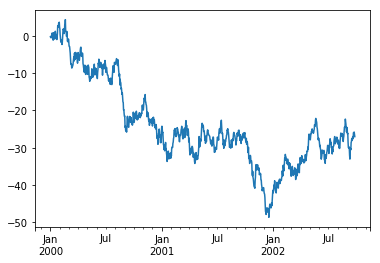

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()  #somma cumulativa dei primi 1000 numeri random

<Figure size 432x288 with 0 Axes>

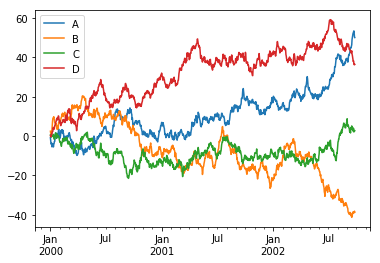

In [115]:
pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])

pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')